Adventures of coupled adjacency Lists and handling of graphs in Python
======================================================================

This notebook is an investigation of the use of coupled adjacency lists in Python. The usecase could for example be to find combined paths over multiple connected circuits in a system.

The interface between different circuits would be common global vertices defined in connectors or cables between the circuits. 

Table 1: Vertices
-----------------
| Global Vertex | Adjacent vertices |
|--------|-------------------|
| A      | tbl1.A, tbl1.B    |
| B      | tbl1.C, tbl1.A    |
| C      | tbl1.D, tbl1.B    |
| D      | tbl1.C, tbl1.D    |

Table 2: Vertices
-----------------
| Global Vertex | Adjacent vertices |
|--------|-------------------|
| A      | tbl2.A, tbl2.B    |
| B      | tbl2.B, tbl2.A    |
| C      | tbl2.C, tbl2.D    |
| D      | tbl2.D, tbl2.C    |

The adjacency lists are coupled by the global vertices. Now let see how this can be implemented in Python.

In [92]:
# set up two lists
list1 = [['A', 'tbl1.A', 'tbl1.B'],
         ['B', 'tbl1.C', 'tbl1.D', 'tbl1.E'],
         ['C', 'tbl1.E', 'tbl1.B', 'tbl1.A'],
            ['D', 'tbl1.B', 'tbl1.F']]

list2 = [['A', 'tbl2.A', 'tbl2.B'],
         ['B', 'tbl2.C', 'tbl2.D'],
         ['C', 'tbl2.E', 'tbl2.F']]


# Convert the lists to dictionaries, Yes we could also set up the dictionaries directly, but this is a more general approach
# since data is often imported from files or databases in list format
dict1 = {x[0]: x[1:] for x in list1}
dict2 = {x[0]: x[1:] for x in list2}

#print the dictionaries row by row
print('dict1:')
for key in dict1:
    print(key, dict1[key])
     
print('\ndict2:')
for key in dict2:
   print(key, dict2[key])
   

dict1:
A ['tbl1.A', 'tbl1.B']
B ['tbl1.C', 'tbl1.D', 'tbl1.E']
C ['tbl1.E', 'tbl1.B', 'tbl1.A']
D ['tbl1.B', 'tbl1.F']

dict2:
A ['tbl2.A', 'tbl2.B']
B ['tbl2.C', 'tbl2.D']
C ['tbl2.E', 'tbl2.F']


We can now convert the dictionaries to adjacency lists. and plot the graphs. The folowing code will plot the two diffrent Lists with diffren colors green an blue.

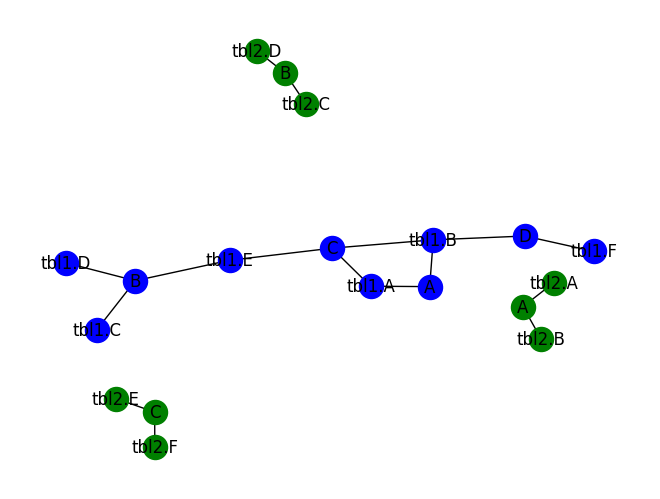

In [93]:
# Convert the dictionaries to graphs
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.Graph()
G2 = nx.Graph()

# build the graph from the dictionaries
for key in dict1:
    for value in dict1[key]:
        G1.add_edge(key, value)
        
for key in dict2:
      for value in dict2[key]:
         G2.add_edge(key, value)
         
# draw the graph
nx.draw(G1, with_labels=True, node_color='b')
nx.draw(G2, with_labels=True, node_color='g')
plt.show()


Now lest merge the two graphs with their common vertices and plot the merged graph.

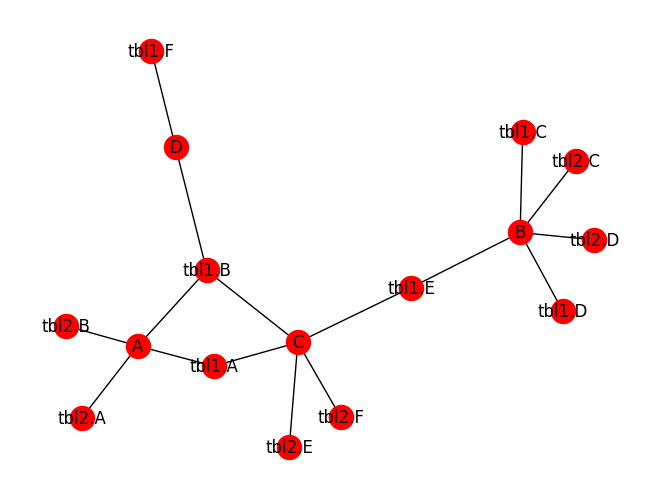

In [94]:
# merge the two graphs
G = nx.compose(G1, G2)
nx.draw(G, with_labels=True, node_color='r')
plt.show()

At this point we have a merged graph with two adjacency lists. We can now perform operations on the graph, such as finding the shortest path between two nodes.

In [95]:
        
# find paths between two nodes
print('\nAll paths from tbl1.F to tbl2.C:')
for path in nx.all_simple_paths(G, source='tbl1.F', target='tbl2.C'):
    print(path)
    
# find the shortest path between two nodes
print('\nShortest path from tbl1.F to tbl2.C:')
print(nx.shortest_path(G, source='tbl1.F', target='tbl2.C'))



All paths from tbl1.F to tbl2.C:
['tbl1.F', 'D', 'tbl1.B', 'A', 'tbl1.A', 'C', 'tbl1.E', 'B', 'tbl2.C']
['tbl1.F', 'D', 'tbl1.B', 'C', 'tbl1.E', 'B', 'tbl2.C']

Shortest path from tbl1.F to tbl2.C:
['tbl1.F', 'D', 'tbl1.B', 'C', 'tbl1.E', 'B', 'tbl2.C']


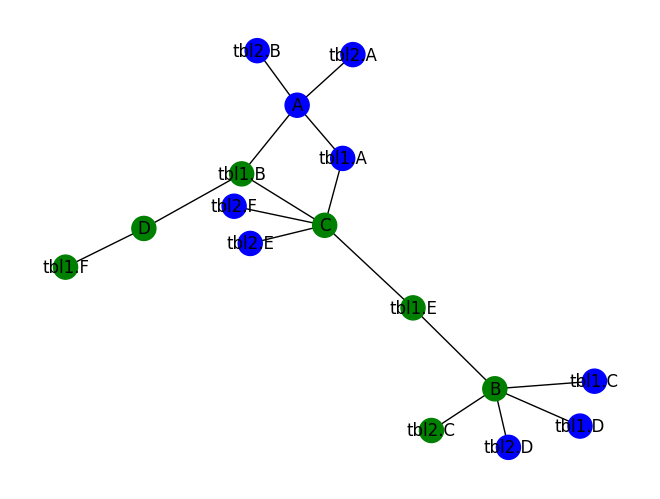

In [96]:
# highlight the shortest path in the graph

# get the shortest path
shortest_path = nx.shortest_path(G, source='tbl1.F', target='tbl2.C')

# change the color of the nodes in the shortest path
color_map = []
for node in G:
    if node in shortest_path:
        color_map.append('green')
    else:
        color_map.append('blue')
nx.draw(G, with_labels=True, node_color=color_map)
plt.show()


